In [2]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Flatten,Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Input
warnings.filterwarnings("ignore")
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import ConvNeXtTiny

2024-10-14 16:31:23.767737: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
train_data=image_dataset_from_directory("classification",batch_size=32,image_size=(32, 32),validation_split=0.25,subset="training",seed=42)
val_data=image_dataset_from_directory("classification",batch_size=32,image_size=(32, 32),validation_split=0.25,subset="validation",seed=42)

Found 324000 files belonging to 6 classes.
Using 243000 files for training.


I0000 00:00:1728903709.980810  158432 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728903710.023324  158432 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728903710.024727  158432 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728903710.026996  158432 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Found 324000 files belonging to 6 classes.
Using 81000 files for validation.


In [4]:
conv=ConvNeXtTiny(input_shape=(32,32,3),include_top=False,weights="imagenet")

In [5]:
model=Sequential([
    conv,
    Flatten(),
    Dense(128,activation="relu"),
    Dense(6,activation="softmax")
])

In [6]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
history=model.fit(train_data,epochs=10,validation_data=val_data,batch_size=16)

Epoch 1/10


I0000 00:00:1728903763.354468  158575 service.cc:146] XLA service 0x703c98003030 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728903763.354528  158575 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 6GB Laptop GPU, Compute Capability 8.6
2024-10-14 16:32:44.461077: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-14 16:32:48.175640: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-10-14 16:32:51.652707: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot', 68 bytes spill stores, 68 bytes spill loads

2024-10-14 16:32:51.703819: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory

   2/7594 ━━━━━━━━━━━━━━━━━━━━ 8:08 64ms/step - accuracy: 0.1641 - loss: 2.6307    

I0000 00:00:1728903803.378072  158575 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7592/7594 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9684 - loss: 0.1051

2024-10-14 16:38:50.536967: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot', 60 bytes spill stores, 60 bytes spill loads

2024-10-14 16:38:51.869822: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_36', 88 bytes spill stores, 88 bytes spill loads

2024-10-14 16:38:52.007475: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_36', 20 bytes spill stores, 20 bytes spill loads

2024-10-14 16:38:52.692699: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_42', 644 bytes spill stores, 644 bytes spill loads

2024-10-14 16:38:52.971683: I external/local_xla/xla/stream_executor/

7594/7594 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9684 - loss: 0.1050

2024-10-14 16:39:04.802688: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_57', 32 bytes spill stores, 32 bytes spill loads



7594/7594 ━━━━━━━━━━━━━━━━━━━━ 426s 48ms/step - accuracy: 0.9684 - loss: 0.1050 - val_accuracy: 0.9928 - val_loss: 0.0229
Epoch 2/10
7594/7594 ━━━━━━━━━━━━━━━━━━━━ 314s 41ms/step - accuracy: 0.9843 - loss: 0.0511 - val_accuracy: 0.9911 - val_loss: 0.0251
Epoch 3/10
7594/7594 ━━━━━━━━━━━━━━━━━━━━ 319s 42ms/step - accuracy: 0.9911 - loss: 0.0274 - val_accuracy: 0.9950 - val_loss: 0.0167
Epoch 4/10
7594/7594 ━━━━━━━━━━━━━━━━━━━━ 318s 42ms/step - accuracy: 0.9935 - loss: 0.0211 - val_accuracy: 0.9962 - val_loss: 0.0113
Epoch 5/10
7594/7594 ━━━━━━━━━━━━━━━━━━━━ 317s 42ms/step - accuracy: 0.9953 - loss: 0.0154 - val_accuracy: 0.9947 - val_loss: 0.0168
Epoch 6/10
7594/7594 ━━━━━━━━━━━━━━━━━━━━ 312s 41ms/step - accuracy: 0.9960 - loss: 0.0131 - val_accuracy: 0.9968 - val_loss: 0.0103
Epoch 7/10
7594/7594 ━━━━━━━━━━━━━━━━━━━━ 310s 41ms/step - accuracy: 0.9968 - loss: 0.0098 - val_accuracy: 0.9968 - val_loss: 0.0103
Epoch 8/10
7594/7594 ━━━━━━━━━━━━━━━━━━━━ 311s 41ms/step - accuracy: 0.9975 - lo

In [8]:
model.save("Convnext_tiny_classification.keras")
import pickle
with open('conv_tiny_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

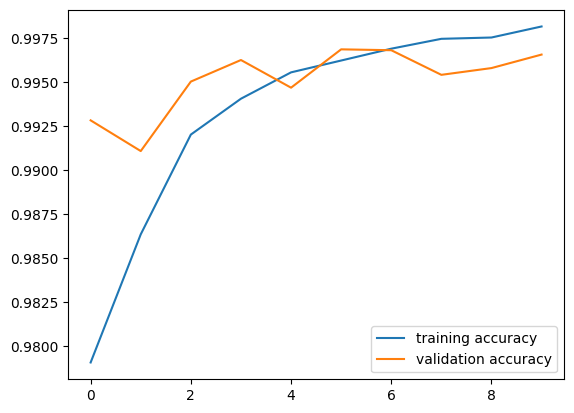

In [9]:
plt.plot(history.history["accuracy"],label="training accuracy")
plt.plot(history.history["val_accuracy"],label="validation accuracy")
plt.legend()
plt.show()

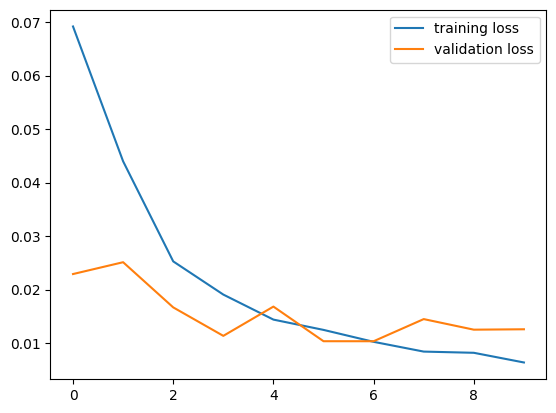

In [10]:
plt.plot(history.history["loss"],label="training loss")
plt.plot(history.history["val_loss"],label="validation loss")
plt.legend()
plt.show()